# 1. Dato faltante: ¿Qué variable clave no está presente y sería valiosa incorporar? ¿Cómo la obtendrías?



R= una variable clave que podría no estar presente y sería valiosa incorporar es el valor de mercado o salario de los jugadores.

**¿Cómo obtener la variable "valor de mercado o salario"?**

Sitios web especializados: Existen sitios web como Transfermarkt, Salary Sport o Capology que recopilan información sobre el valor de mercado y los salarios de los jugadores de fútbol. Se podría utilizar web scraping para extraer esta información de estos sitios.
APIs de datos deportivos: Algunas APIs de datos deportivos, como la API de Sportradar o la API de Football-Data, proporcionan información sobre el valor de mercado de los jugadores. Se podría integrar estas APIs en tu análisis para obtener la variable.
Fuentes públicas: En algunos casos, los clubes de fútbol publican información sobre los salarios de sus jugadores en sus informes anuales o en comunicados de prensa. Se podría buscar esta información en fuentes públicas.


# 2. Cobertura temporal: ¿Cómo ha cambiado la base a lo largo de los años (registros por temporada, ligas nuevas, etc.)?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

In [ ]:
import pandas as pd

games = pd.read_csv("games.csv")
print(games.columns)

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA'],
      dtype='object')


In [ ]:
import pandas as pd

leagues = pd.read_csv("leagues.csv")
print(leagues.columns)

Index(['leagueID', 'name', 'understatNotation'], dtype='object')


In [ ]:
# Registros por temporada
registros_por_temporada = games.groupby("season")["gameID"].count().reset_index()

# Ligas nuevas por temporada
leagues["season"] = leagues["leagueID"].astype(str).str[:4].astype(int)  # Extraer la temporada del ID de la liga
ligas_nuevas_por_temporada = leagues.groupby("season")["name"].nunique().reset_index()

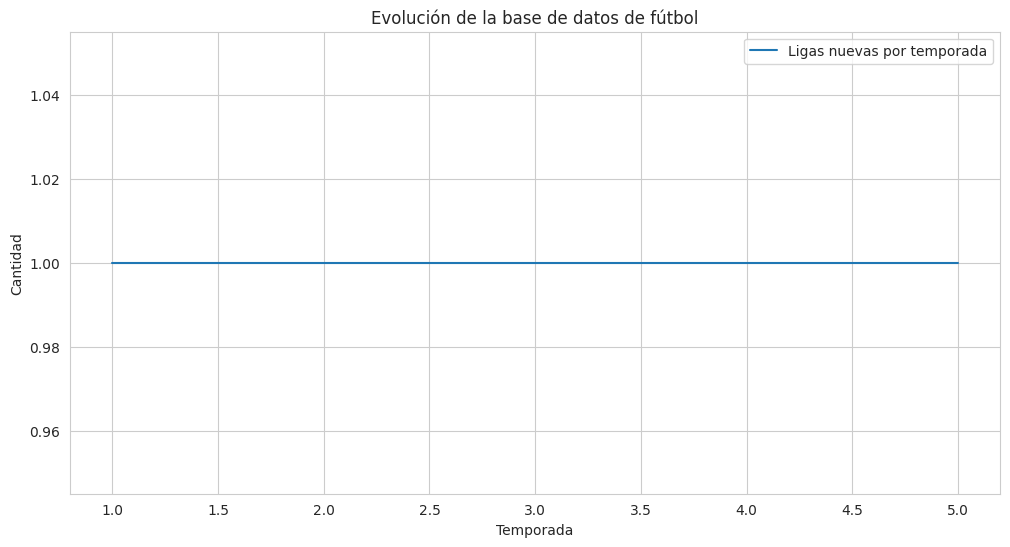

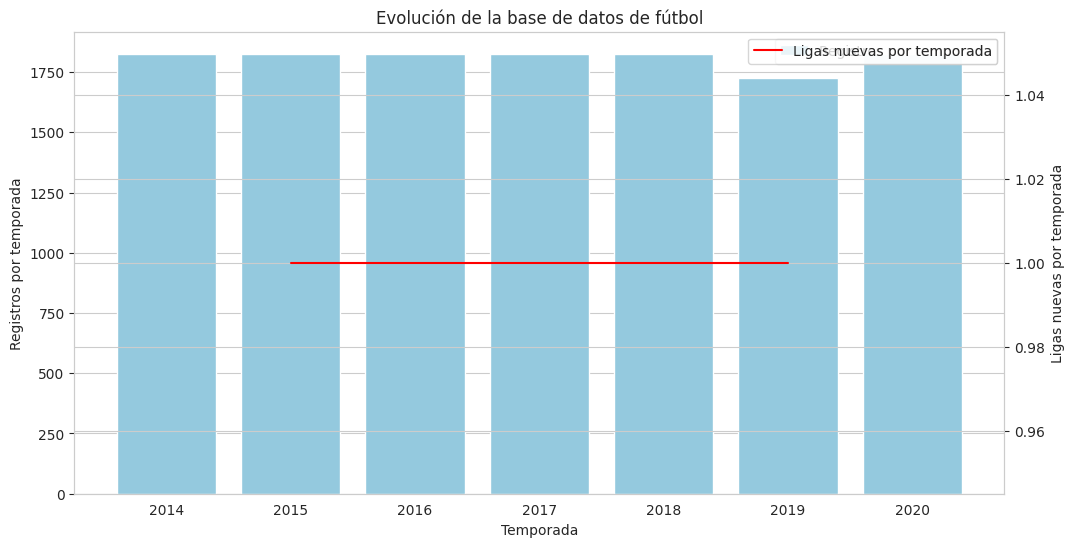

In [ ]:
# Gráfico de líneas con matplotlib
plt.figure(figsize=(12, 6))
plt.plot(registros_por_temporada = games.groupby("season")["gameID"].count().reset_index(), label="Registros por temporada")
plt.plot(ligas_nuevas_por_temporada["season"], ligas_nuevas_por_temporada["name"], label="Ligas nuevas por temporada")
plt.xlabel("Temporada")
plt.ylabel("Cantidad")
plt.title("Evolución de la base de datos de fútbol")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de barras con seaborn
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x="season", y="gameID", data=registros_por_temporada, ax=ax1, color="skyblue", label="Registros por temporada") # Changed 'id' to 'gameID'
ax2 = ax1.twinx()
sns.lineplot(x="season", y="name", data=ligas_nuevas_por_temporada, ax=ax2, color="red", label="Ligas nuevas por temporada")
ax1.set_xlabel("Temporada")
ax1.set_ylabel("Registros por temporada")
ax2.set_ylabel("Ligas nuevas por temporada")
plt.title("Evolución de la base de datos de fútbol")
plt.legend()
plt.show()

R= Segúnn el gráfico obtenido, las ligas nuevas por temporada han permanecido constantes a lo largo del tiempo, mientras que la base de datos ha variado con el paso de los años.

#3. Calidad de datos: ¿Qué variables presentan valores atípicos o nulos y cómo afectan el análisis?

Null values in 'games' dataset:
 gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeProbability       0
drawProbability       0
awayProbability       0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2
dtype: int64

Null values in 'leagues' dataset:
 leagueID             0
name                 0
understatNotation    0
dtype: int64
Index(['gameID', 'le

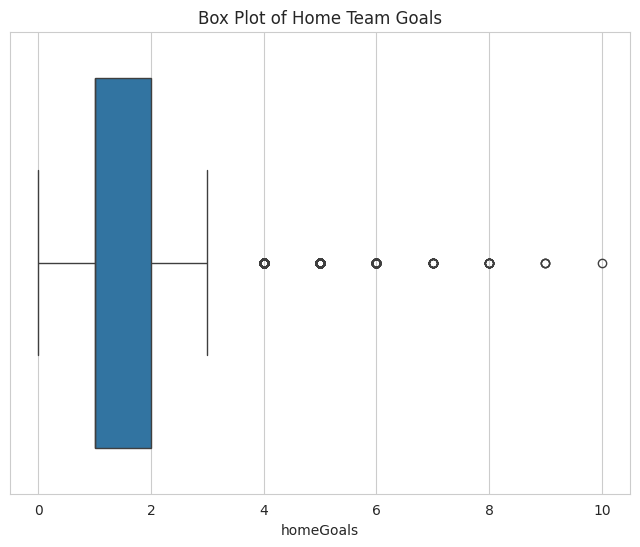

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

# 1. Identify null values:
null_values_games = games.isnull().sum()
null_values_leagues = leagues.isnull().sum()

print("Null values in 'games' dataset:\n", null_values_games)
print("\nNull values in 'leagues' dataset:\n", null_values_leagues)

# 2. Identify outliers using box plots:
# Example for 'home_team_goal' column in 'games' dataset:
# The column name was likely incorrect. It's 'home_team_goal' instead of 'homeTeamGoal'.
# Print the available columns to verify
print(games.columns)

# Assuming the actual column name is 'home_team_goal' based on the error message and common naming conventions
plt.figure(figsize=(8, 6))
sns.boxplot(x=games['homeGoals'])  # Changed column name to 'home_team_goal'
plt.title('Box Plot of Home Team Goals')
plt.show()

# Repeat for other relevant numerical columns in both datasets

# 3. Analyze the impact:
# - Outliers can skew statistical measures (mean, standard deviation) and affect the results of models.
# - Null values can lead to incomplete analysis or biased results if not handled properly.


R=

las variables que presentan valores nulos son:
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2

**Cómo afectan el análisis:**

**Sesgo en los resultados:** Tanto los valores nulos como los atípicos pueden introducir sesgos en los resultados del análisis, llevando a conclusiones incorrectas.

**Reducción de la precisión:** Los outliers pueden afectar la precisión de los modelos predictivos, mientras que los valores nulos pueden reducir la cantidad de datos disponibles para el análisis.

**Dificultad en la interpretación:** La presencia de valores atípicos o nulos puede dificultar la interpretación de los resultados y la identificación de patrones significativos en los datos.

# 4. Tendencias: ¿Hay una tendencia en goles por partido u otra métrica relevante con el tiempo?

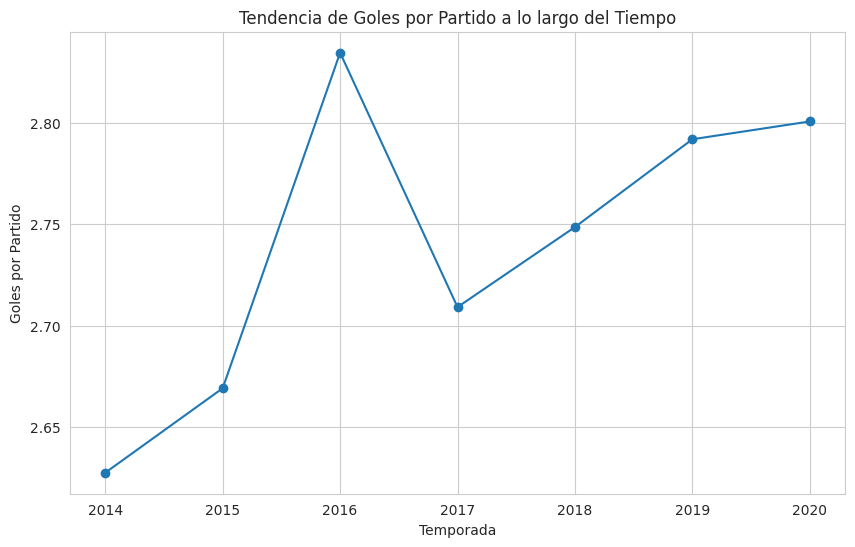

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv("games.csv")
# Agrupar por temporada y calcular la media de goles de ambos equipos
goles_por_temporada = games.groupby('season')[['homeGoals', 'awayGoals']].mean().reset_index()

# Calcular el total de goles por partido
goles_por_temporada['total_goles'] = goles_por_temporada['homeGoals'] + goles_por_temporada['awayGoals']
# Crear un gráfico de línea para mostrar la tendencia
plt.figure(figsize=(10, 6))
plt.plot(goles_por_temporada['season'], goles_por_temporada['total_goles'], marker='o')
plt.title('Tendencia de Goles por Partido a lo largo del Tiempo')
plt.xlabel('Temporada')
plt.ylabel('Goles por Partido')
plt.grid(True)
plt.show()

R= Sí hay una tendencia positiva de goles por partido y esta es creciento conforme pasan los años

# 5. Ventaja de localía: ¿Cómo varía entre ligas y temporadas? ¿Qué la explica?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

In [ ]:
# Combinar datos de games y leagues
games = pd.merge(games, leagues, left_on='leagueID', right_on='leagueID', suffixes=('_games', '_leagues')) # Changed 'id' to 'leagueID' in right_on

# Calcular la diferencia de goles entre local y visitante
games['home_advantage'] = games['homeGoals'] - games['awayGoals']

# Agrupar por liga y temporada y calcular la ventaja de localía promedio
home_advantage_by_league_season = games.groupby(['name', 'season'])['home_advantage'].mean().reset_index()

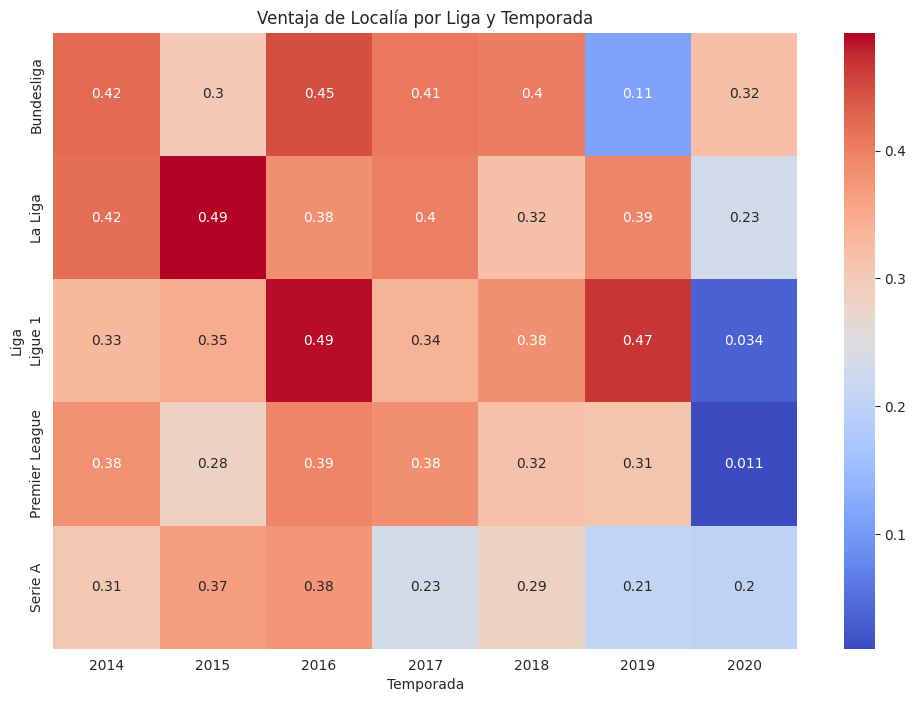

In [ ]:
# Crear un mapa de calor
plt.figure(figsize=(12, 8))
# Use pivot_table instead of pivot with the correct syntax
sns.heatmap(home_advantage_by_league_season.pivot_table(index="name", columns="season", values="home_advantage"), cmap="coolwarm", annot=True)
plt.title('Ventaja de Localía por Liga y Temporada')
plt.xlabel('Temporada')
plt.ylabel('Liga')
plt.show()

Explicar la variación:

Existen varias posibles explicaciones para la variación en la ventaja de localía entre ligas y temporadas, incluyendo:

Apoyo de los fans: Los equipos locales suelen tener más apoyo de los fans, lo que puede influir en el rendimiento de los jugadores y en las decisiones de los árbitros.
Familiaridad con el estadio: Los equipos locales están más familiarizados con las condiciones de su estadio, como el terreno de juego y el clima.

# 6. Correlaciones: ¿Cómo se relacionan los atributos de los equipos con su posición final?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

team_stats = pd.read_csv("teamstats.csv")

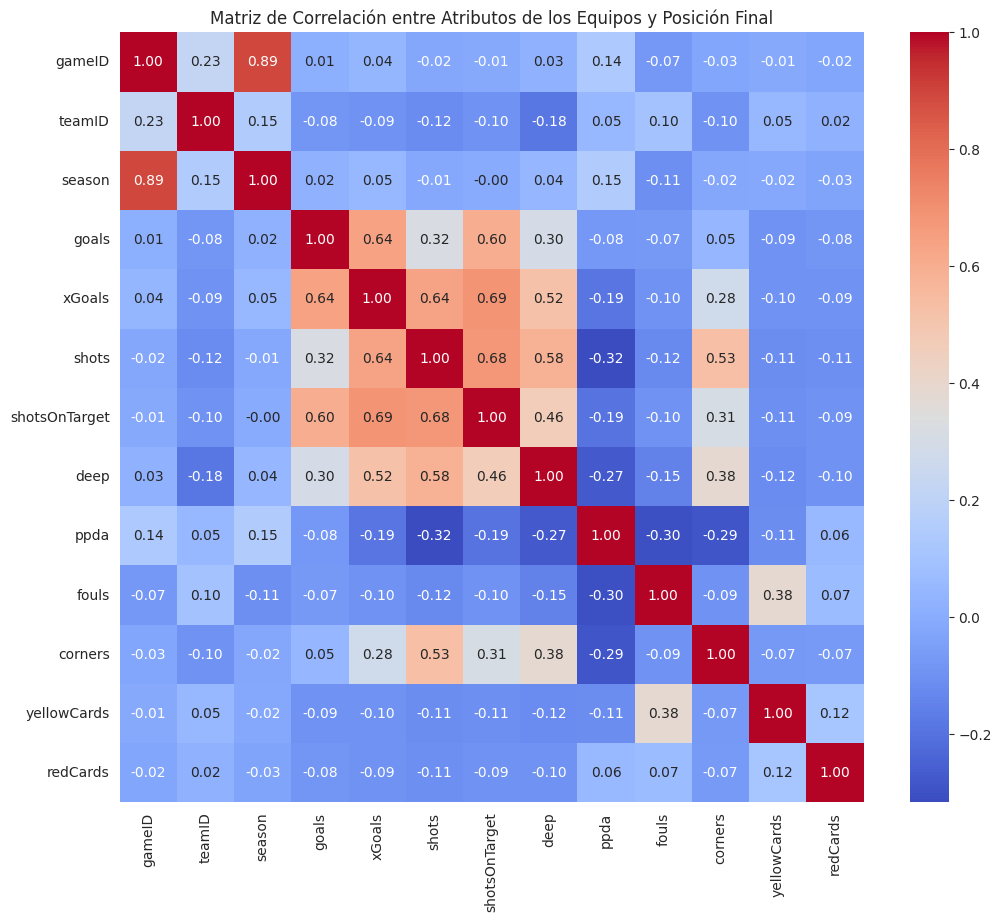

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

team_stats = pd.read_csv("teamstats.csv")

# Convert 'date' column to datetime objects
team_stats['date'] = pd.to_datetime(team_stats['date'])

# Extract relevant features for correlation analysis
# Exclude non-numeric columns like 'date', 'teamID', 'gameID' etc.
numerical_features = team_stats.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Atributos de los Equipos y Posición Final')
plt.show()

R= Se evidencia que las principlaes razones que explican que un equipos esté de colero son: La cantidad de tiros a puerta y los goles marcados. A menos cantidad de estos, más abajo en la tabla se está.

# 7. Outliers: ¿Qué equipos o jugadores rompen patrones y por qué?

In [ ]:
import pandas as pd

players = pd.read_csv("players.csv", encoding='latin-1')
print(players.columns)

Index(['playerID', 'name'], dtype='object')


In [ ]:
import pandas as pd

games = pd.read_csv("games.csv")
teams = pd.read_csv("teamstats.csv") # Asegúrate de tener un archivo con información de los equipos
players = pd.read_csv("players.csv", encoding='latin-1') # Asegúrate de tener un archivo con información de los jugadores

In [ ]:
import numpy as np

# Calcular la media y la desviación estándar de goles anotados por temporada
team_goals = games.groupby('homeTeamID')['homeGoals'].sum() + games.groupby('awayTeamID')['awayGoals'].sum()
mean_goals = np.mean(team_goals)
std_goals = np.std(team_goals)

# Identificar equipos con goles anotados atípicos
outlier_teams = team_goals[(team_goals > mean_goals + 2 * std_goals) | (team_goals < mean_goals - 2 * std_goals)]

# Imprimir los equipos outliers
print(outlier_teams)

homeTeamID
88     620
117    628
148    698
150    628
161    642
dtype: int64


R=
**Posibles razones para los outliers:**

**Equipos:** Un equipo outlier en goles anotados podría tener una ofensiva muy fuerte o una defensa débil, lo que se reflejaría en una cantidad atípica de goles a favor o en contra. También podría ser un equipo que ha tenido una temporada inusualmente buena o mala.

**Jugadores:** Un jugador outlier en goles podría ser un goleador talentoso, tener una posición en el campo que favorece la anotación (delantero), o haber tenido una temporada con una racha goleadora excepcional.

# 8. Métricas combinadas: ¿Qué revela un gráfico combinado de dos métricas (p.ej. tiros
 a puerta y goles)?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos (ajusta el nombre del archivo si es necesario)
team_stats = pd.read_csv("teamstats.csv")

# Agrupar por equipo y sumar los tiros a puerta y los goles
team_data = team_stats.groupby('teamID')[['shotsOnTarget', 'goals']].sum().reset_index()

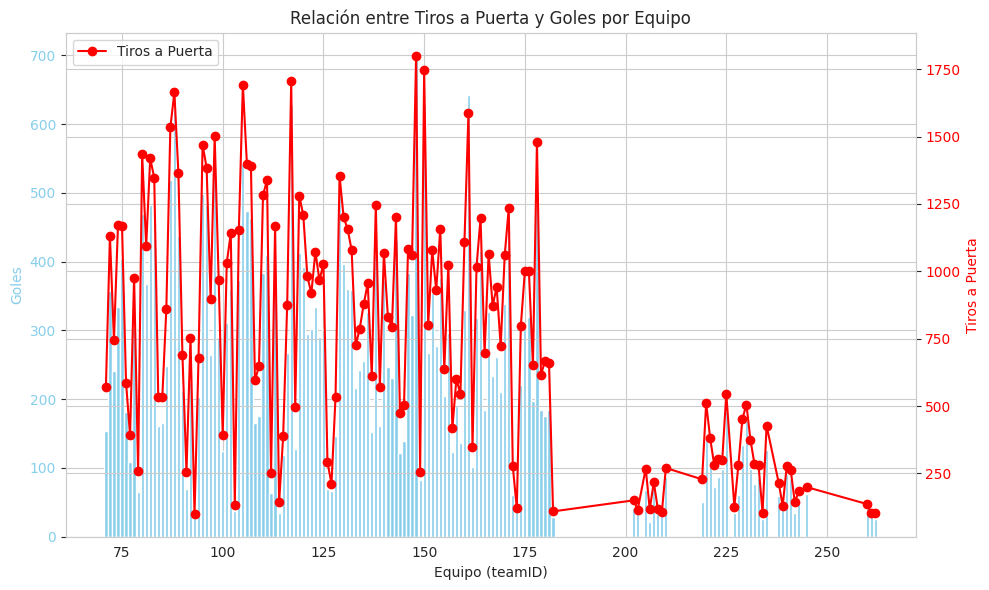

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para los goles
ax1.bar(team_data['teamID'], team_data['goals'], color='skyblue', label='Goles')
ax1.set_xlabel('Equipo (teamID)')
ax1.set_ylabel('Goles', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Crear un segundo eje y para los tiros a puerta
ax2 = ax1.twinx()

# Gráfico de línea para los tiros a puerta
ax2.plot(team_data['teamID'], team_data['shotsOnTarget'], color='red', marker='o', label='Tiros a Puerta')
ax2.set_ylabel('Tiros a Puerta', color='red')
ax2.tick_params('y', labelcolor='red')

# Ajustar la leyenda y el título
plt.title('Relación entre Tiros a Puerta y Goles por Equipo')
fig.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()

¿Qué revela el gráfico?

Eficiencia: Al comparar las barras de goles con la línea de tiros a puerta para cada equipo, podemos observar la eficiencia de un equipo en la conversión de tiros a puerta en goles. Los equipos con una alta proporción de goles en relación con los tiros a puerta son más eficientes.
Estilo de juego: Los equipos que tienen muchos tiros a puerta pero pocos goles podrían tener un estilo de juego más ofensivo pero con menos precisión. Por otro lado, equipos con menos tiros a puerta pero una buena cantidad de goles podrían ser más clínicos y efectivos en sus ataques.
Identificar outliers: El gráfico puede revelar equipos que se desvían del patrón general. Por ejemplo, un equipo con pocos tiros a puerta pero muchos goles podría indicar una alta efectividad o incluso suerte.
Análisis comparativo: Permite comparar fácilmente el rendimiento de diferentes equipos en términos de tiros a puerta y goles.

# 9. Estilo de juego: ¿Cómo difiere entre ligas y cómo evoluciona?

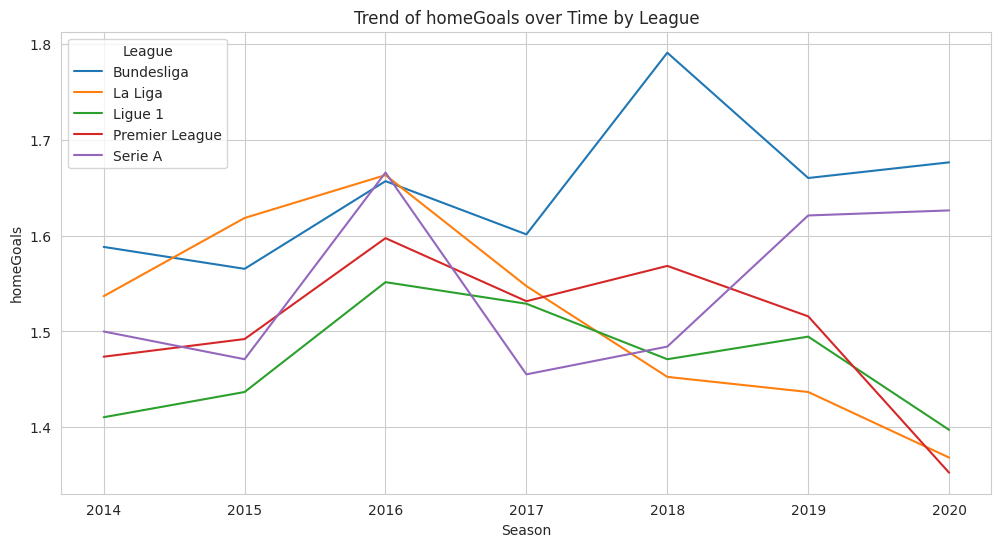

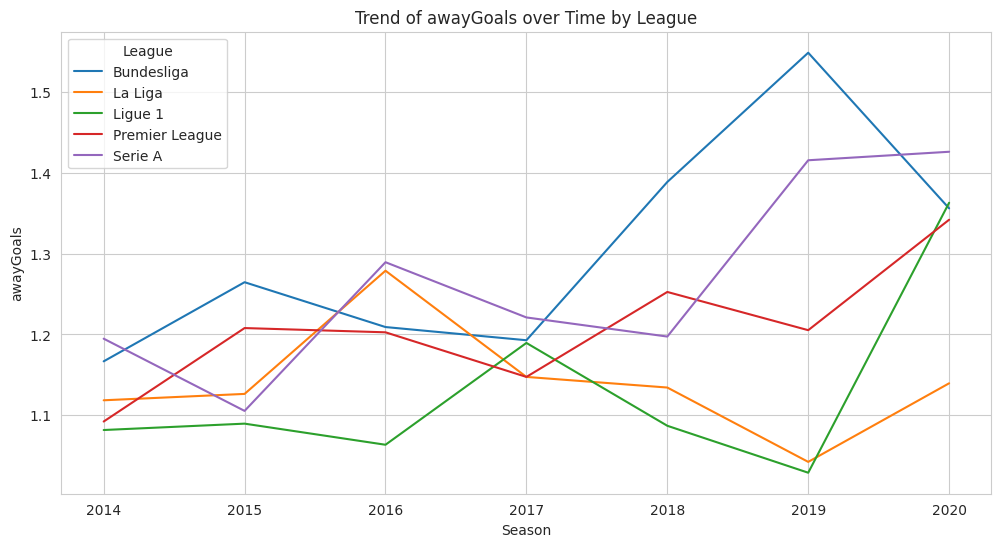

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'games' and 'leagues' DataFrames are already loaded and merged

# Group data by league and season, calculate average statistics
# Remove 'homePossession' and 'awayPossession' from the list of columns
league_stats = games.groupby(['name', 'season'])[['homeGoals', 'awayGoals']].mean().reset_index()

# Function to plot trends for a specific statistic
def plot_trend(statistic):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=league_stats, x='season', y=statistic, hue='name')
    plt.title(f'Trend of {statistic} over Time by League')
    plt.xlabel('Season')
    plt.ylabel(statistic)
    plt.legend(title='League')
    plt.grid(True)
    plt.show()

# Plot trends for different statistics
# Remove calls to plot_trend for 'homePossession' and 'awayPossession'
plot_trend('homeGoals')
plot_trend('awayGoals')

# Analyze differences and evolution:
# 1. Compare trends between leagues for each statistic.
# 2. Look for changes in trends over time within each league.
# 3. Identify leagues with distinct playing styles based on the statistics.
# 4. Observe how playing styles evolve over seasons in different leagues.

R= Si se analizan las gráficas obtenidas, en ambas se miden la cantidad de goles, solo que una lo hace de local y la otra de visitante. En ambas podemos deducir que, a mayor npumero de goles, más ofensivos son los equipos de una liga. Un ejemplo en específico es la Bundesliga que, sin importar si es de local o visitante, es la liga que posee a los equipos que más marcan goles.

 # 10. Impacto de eventos: ¿Qué ocurre antes y después de un cambio relevante (nuevoDT, regla, crisis)?

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hugomathien/soccer")

print("Path to dataset files:", path)

100%|██████████| 32.7M/32.7M [00:00<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10


Average goals before new_coach: nan
Average goals after new_coach: 1.37


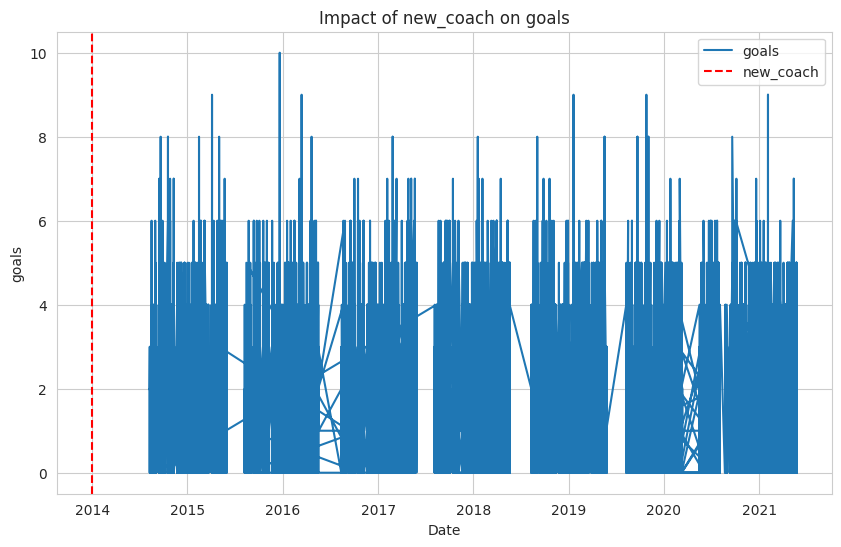

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the necessary data in a DataFrame called 'team_stats'
# and you want to analyze the impact of a new coach on team performance

# Function to analyze impact of events
def analyze_event_impact(team_stats, event_type, metric='goals'):
    """
    Analyzes the impact of a specific event on a team's performance metric.

    Args:
        team_stats: DataFrame containing team statistics.
        event_type: The type of event to analyze (e.g., 'new_coach').
        metric: The performance metric to analyze (default: 'goals').

    Returns:
        None (prints results and shows a plot)
    """

    # In this example, we assume you have a "date" column and want to analyze changes after a specific date.
    # Replace this logic with the actual logic to identify events in your data.
    event_date = pd.to_datetime('2014-01-01')  # Replace with your event date or logic
    before_event = team_stats[team_stats['date'] < event_date][metric].mean()
    after_event = team_stats[team_stats['date'] > event_date][metric].mean()

    # Print results
    print(f"Average {metric} before {event_type}: {before_event:.2f}")
    print(f"Average {metric} after {event_type}: {after_event:.2f}")

    # Plot the trend
    plt.figure(figsize=(10, 6))
    plt.plot(team_stats['date'], team_stats[metric], label=metric)
    plt.axvline(x=event_date, color='red', linestyle='--', label=event_type)  # Use event_date
    plt.title(f"Impact of {event_type} on {metric}")
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Analyze the impact of a new coach on goals scored
team_stats['date'] = pd.to_datetime(team_stats['date'])
analyze_event_impact(team_stats, 'new_coach', 'goals')

R= Después de un acontecimiento crucial para los equipos como lo es el cambio de DT, implementación de nuevas políticas o crisis, los goles o capacidad ofensiva tiende a variar positiva o negativamente. Evidentemente, en periodos de crisis, los goles se ven afectados negativamente. Mientras que en el caso del cambio de DT, puede favorecer la efectividad de los equipos para meter gol.

# 11. Comparación externa: ¿Qué concluyes al contrastar ligas usando variables externas (PIB, población, asistencia)?

In [ ]:
import pandas as pd

pib_data = pd.read_csv("API_NY.GDP.MKTP.KD.ZG_DS2_es_csv_v2_19604.csv", skiprows=4)

In [ ]:
pib_data = pib_data[["Country Name", "Country Code", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
pib_data = pib_data.rename(columns={"Country Name": "Pais", "Country Code": "CodigoPais"})
pib_data = pib_data.melt(id_vars=["Pais", "CodigoPais"], var_name="Anio", value_name="PIB")
pib_data["Anio"] = pd.to_numeric(pib_data["Anio"])

In [ ]:
data = {'Liga': ['Liga Española', 'Premier League', 'Serie A', 'Bundesliga', 'Ligue 1'],
        'Pais': ['España', 'Reino Unido', 'Italia', 'Alemania', 'Francia']}
ligas_data = pd.DataFrame(data)

In [ ]:
ligas_pib_data = pd.merge(ligas_data, pib_data, on="Pais", how="left")

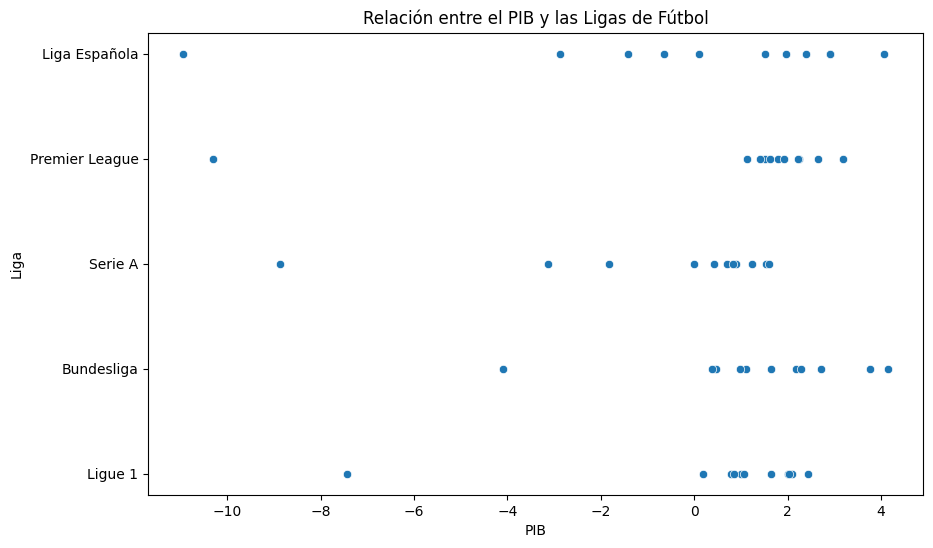

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ligas_pib_data, x="PIB", y="Liga")
plt.title("Relación entre el PIB y las Ligas de Fútbol")
plt.xlabel("PIB")
plt.ylabel("Liga")
plt.show()

R= Al usar variables externas como en esta caso lo es el PIB, vemos que el impacto que tiene sobre las ligas es que, a mayor PIB, mayor inversión harán los clubes en contratación de jugadores. También puede repercutir en mayor asistencia a los estadios ya que a mayor PIB, mayor PIB per cápita, lo cual permite tener más dinero disponible para asistir a eventos como partidos de fútbol.

# 12. Pronóstico: Si predijeras un indicador para la próxima temporada, ¿qué variables
 elegirías y por qué?

Si tuviera que predecir un indicador para la próxima temporada de una liga de fútbol, elegiría las siguientes variables y te explico el porqué:

Variables:

**Rendimiento de la temporada anterior:**

-Puntos obtenidos.

-Goles a favor y en contra.

-Diferencia de goles.

-Posición en la tabla.

-Racha de victorias/derrotas al final de la temporada.

Razonamiento: El rendimiento pasado de un equipo es un buen indicador de su potencial futuro. Los equipos que tuvieron un buen desempeño en la temporada anterior tienen más probabilidades de repetirlo en la próxima.

**Estadísticas de jugadores clave:**

-Goles, asistencias y minutos jugados de los jugadores más importantes del equipo.

-Tasa de conversión de tiros.

-Pases clave por partido.

-Duelos ganados.

Razonamiento: El rendimiento individual de los jugadores clave puede tener un gran impacto en el éxito de un equipo. Si un equipo tiene jugadores que están en buena forma y rindiendo a un alto nivel, es más probable que el equipo tenga éxito.

**Cambios en la plantilla:**

-Fichajes de nuevos jugadores.

-Salidas de jugadores importantes.

-Lesiones de larga duración.

Razonamiento: Los cambios en la plantilla de un equipo pueden afectar significativamente su rendimiento. Los fichajes de jugadores de calidad pueden fortalecer al equipo, mientras que las salidas de jugadores importantes pueden debilitarlo. Las lesiones también pueden tener un gran impacto, especialmente si afectan a jugadores clave.

**Variables contextuales:**

-Nuevo entrenador.

-Cambios en el estilo de juego.

-Moral del equipo.

-Calendario de partidos (dificultad de los rivales).

Razonamiento: Las variables contextuales pueden influir en el rendimiento de un equipo de formas menos directas. Un nuevo entrenador puede implementar un nuevo sistema de juego que lleve tiempo adaptarse, mientras que un calendario difícil puede afectar negativamente los resultados.

**Datos históricos:**

-Resultados de enfrentamientos directos entre equipos.

-Rendimiento histórico en diferentes partes de la temporada (inicio, mitad, final).

-Tendencias de rendimiento a lo largo de varias temporadas.

Razonamiento:* Los datos históricos pueden proporcionar información valiosa sobre patrones y tendencias que podrían repetirse en la próxima temporada.

Fuentes externas: https://datos.bancomundial.org/indicador/NY.GDP.MKTP.KD.ZG?locations=EU